In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [6]:
import os

path = os.listdir('../data/brain_tumor/Training/')
classes = {'no_tumor':0,'pituitary_tumor':1}

In [7]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '../data/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [8]:
np.unique(Y)

array([0, 1])

In [9]:
X = np.array(X)
Y = np.array(Y)

In [10]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [11]:
X.shape

(1222, 200, 200)

Visualize Data

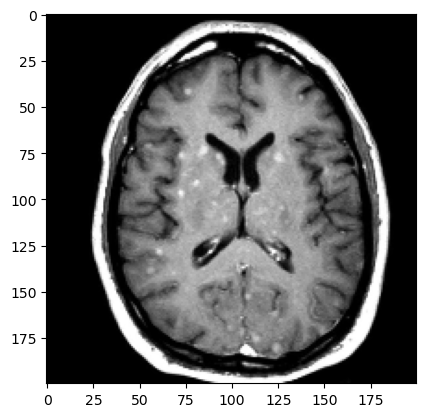

In [12]:

plt.imshow(X[3], cmap='gray')

In [13]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

Split Data


In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [15]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scaling


In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


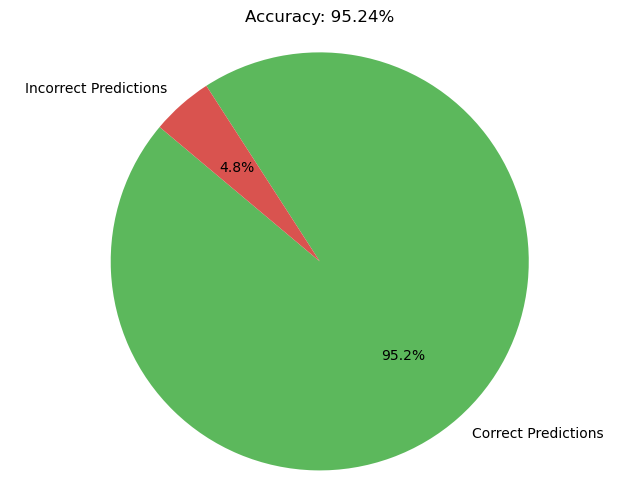

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined 'dec' and 'sv' (support vector machine) objects

# Load testing data
testing_path = '../data/brain_tumor/Testing/'
no_tumor_path = os.path.join(testing_path, 'no_tumor/')
pituitary_tumor_path = os.path.join(testing_path, 'pituitary_tumor/')

# Function to preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (200, 200))
    img = img.reshape(1, -1) / 255
    return img

# Initialize variables for accuracy calculation
total_images = 0
correct_predictions = 0

# Test on 'no_tumor' images
for i in os.listdir(no_tumor_path)[:12]:
    img_path = os.path.join(no_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 0:  # Assuming 'no_tumor' is encoded as 0
        correct_predictions += 1
    total_images += 1

# Test on 'pituitary_tumor' images
for i in os.listdir(pituitary_tumor_path)[:9]:
    img_path = os.path.join(pituitary_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 1:  # Assuming 'pituitary_tumor' is encoded as 1
        correct_predictions += 1
    total_images += 1

# Calculate incorrect predictions
incorrect_predictions = total_images - correct_predictions

# Data for pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_predictions, incorrect_predictions]
colors = ['#5cb85c', '#d9534f']  # Green for correct, red for incorrect

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy: {:.2f}%'.format(correct_predictions / total_images * 100))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Train model


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [16]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

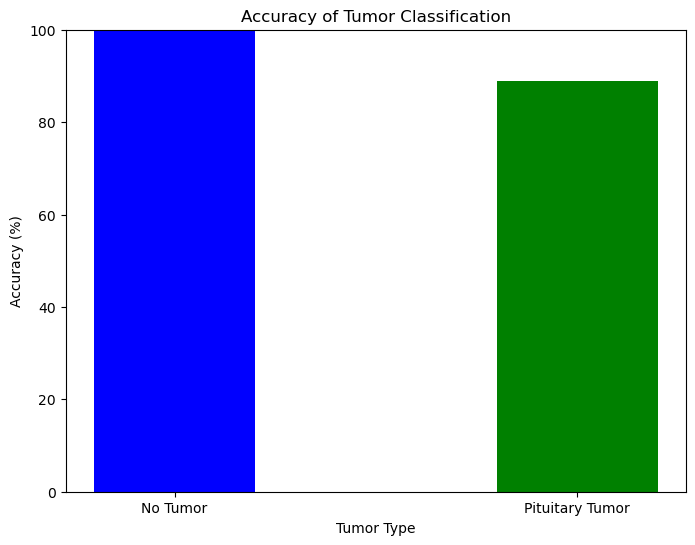

In [34]:
# Plotting the bar chart with decreased bar size
labels = ['No Tumor', 'Pituitary Tumor']
accuracies = [no_tumor_accuracy, pituitary_tumor_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'], width=0.4)  # Decrease width to 0.4
plt.xlabel('Tumor Type')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Tumor Classification')
plt.ylim(0, 100)  # Set y-axis limit to ensure accuracy percentage is visible
plt.show()

Evaluation


In [17]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [18]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


Prediction

In [19]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [20]:
pred[36]

0

In [21]:
ytest[36]

1

Test Model

In [22]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

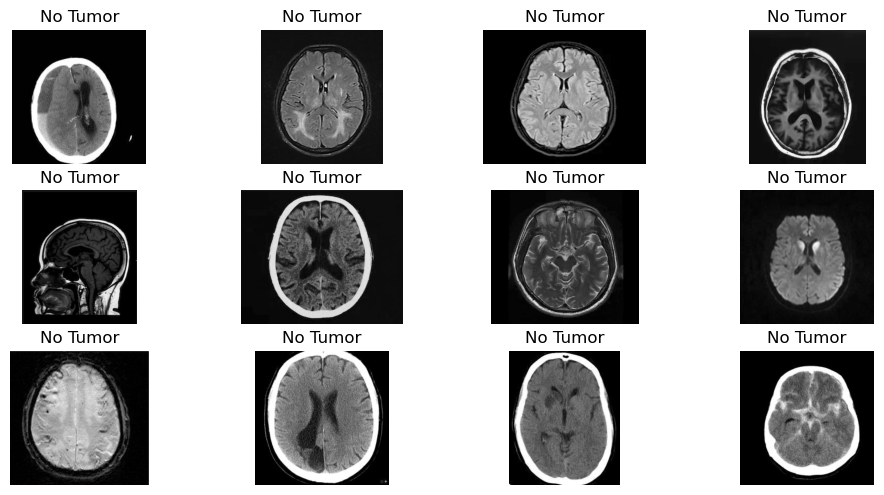

In [23]:
plt.figure(figsize=(12,8))
p = os.listdir('../data/brain_tumor/Testing/')
c=1
for i in os.listdir('../data/brain_tumor/Testing/no_tumor/')[:12]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('../data/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
    

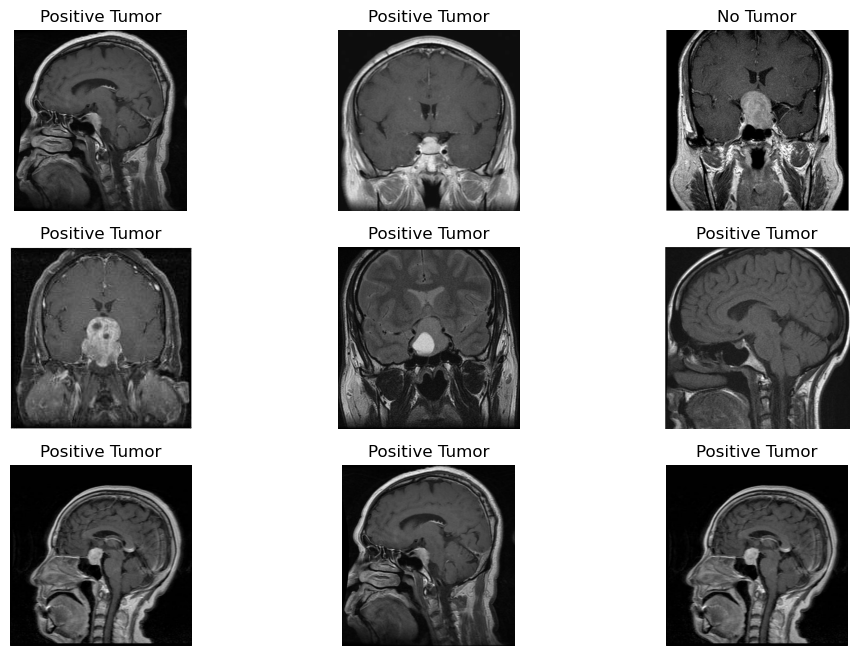

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('../data/brain_tumor/Testing/')
c=1
for i in os.listdir('../data/brain_tumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('../data/brain_tumor/Testing/Pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined 'dec' and 'sv' (support vector machine) objects

# Load testing data
testing_path = '../data/brain_tumor/Testing/'
no_tumor_path = os.path.join(testing_path, 'no_tumor/')
pituitary_tumor_path = os.path.join(testing_path, 'pituitary_tumor/')

# Function to preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (200, 200))
    img = img.reshape(1, -1) / 255
    return img

# Initialize variables for accuracy calculation
total_images = 0
correct_predictions = 0

# Test on 'no_tumor' images
for i in os.listdir(no_tumor_path)[:12]:
    img_path = os.path.join(no_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 0:  # Assuming 'no_tumor' is encoded as 0
        correct_predictions += 1
    total_images += 1

# Test on 'pituitary_tumor' images
for i in os.listdir(pituitary_tumor_path)[:9]:
    img_path = os.path.join(pituitary_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 1:  # Assuming 'pituitary_tumor' is encoded as 1
        correct_predictions += 1
    total_images += 1

# Calculate accuracy
accuracy = (correct_predictions / total_images) * 100
print("Accuracy:", accuracy)


Accuracy: 95.23809523809523


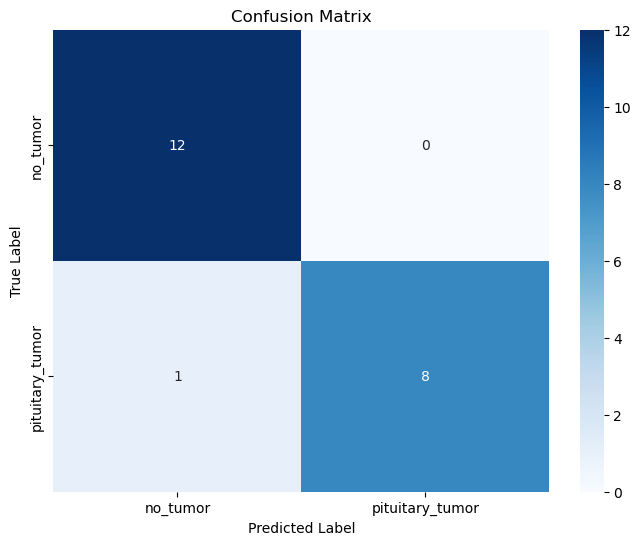

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize variables for storing true labels and predicted labels
true_labels = []
predicted_labels = []

# Test on 'no_tumor' images
for i in os.listdir(no_tumor_path)[:12]:
    img_path = os.path.join(no_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    true_labels.append(0)  # Encoding 'no_tumor' as 0
    predicted_labels.append(pred_label)

# Test on 'pituitary_tumor' images
for i in os.listdir(pituitary_tumor_path)[:9]:
    img_path = os.path.join(pituitary_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    true_labels.append(1)  # Encoding 'pituitary_tumor' as 1
    predicted_labels.append(pred_label)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the heat map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no_tumor', 'pituitary_tumor'], yticklabels=['no_tumor', 'pituitary_tumor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


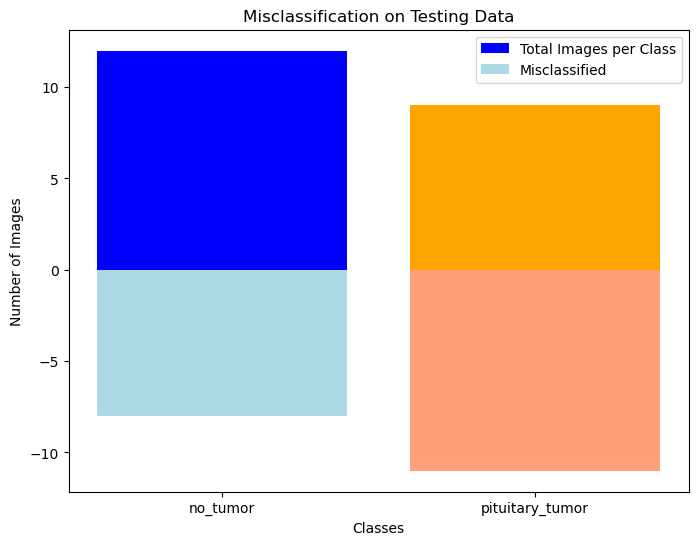

In [30]:
# Calculate accuracy
accuracy = (correct_predictions / total_images) * 100

# Define class labels
class_labels = ['no_tumor', 'pituitary_tumor']

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(class_labels, [12, 9], color=['blue', 'orange'], label='Total Images per Class')
plt.bar(class_labels, [12 - correct_predictions, 9 - correct_predictions], color=['lightblue', 'lightsalmon'], label='Misclassified')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Misclassification on Testing Data')
plt.legend()
plt.show()


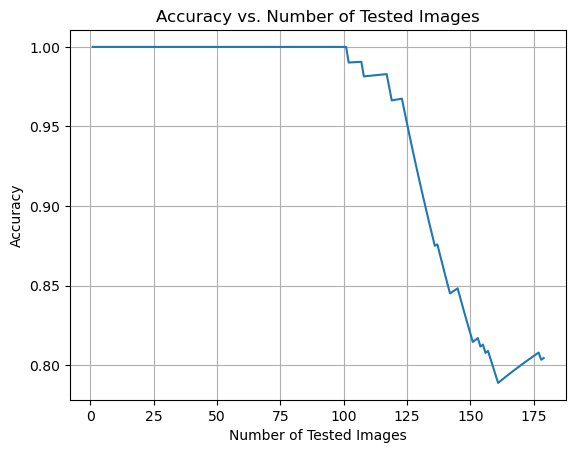

In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined 'dec' and 'sv' (support vector machine) objects

# Load testing data
testing_path = '../data/brain_tumor/Testing/'
no_tumor_path = os.path.join(testing_path, 'no_tumor/')
pituitary_tumor_path = os.path.join(testing_path, 'pituitary_tumor/')

# Function to preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (200, 200))
    img = img.reshape(1, -1) / 255
    return img

# Initialize variables for accuracy calculation
total_images = 0
correct_predictions = 0
accuracy_list = []  # List to store accuracy for each batch of tested images

# Test on 'no_tumor' images
for i in os.listdir(no_tumor_path):
    img_path = os.path.join(no_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 0:  # Assuming 'no_tumor' is encoded as 0
        correct_predictions += 1
    total_images += 1
    accuracy_list.append(correct_predictions / total_images)

# Test on 'pituitary_tumor' images
for i in os.listdir(pituitary_tumor_path):
    img_path = os.path.join(pituitary_tumor_path, i)
    img1 = preprocess_image(img_path)
    pred_label = sv.predict(img1)
    if pred_label == 1:  # Assuming 'pituitary_tumor' is encoded as 1
        correct_predictions += 1
    total_images += 1
    accuracy_list.append(correct_predictions / total_images)

# Plotting the line plot
plt.plot(range(1, total_images + 1), accuracy_list)
plt.title('Accuracy vs. Number of Tested Images')
plt.xlabel('Number of Tested Images')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
